## Analyzing the City of Toronto's Airbnb Listings 

#### This is a brief analysis of Toronto's Airbnb Listings. The goal is to use this data to answer 3 major questions
* Which listing was booked the most?
* How does price affect booking i.e. if the price of a listing is low does it get booked more?
* What time of the year gets booked the most in Toronto?

We're going to be using two data sets both retrieved from Airbnb's open data website. The first data set contains basic information like the listing id, the dates that have been booked, the price, the minimum and maximum nuber of nights guests can stay. The second data set contains more information such as type of neighbourhood the listing is located in, the host id and name, number of reviews per month e.t.c

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv(r'/Users/chezoudezue/Desktop/calendar.csv')
df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,291699,2019-12-08,t,$34.00,$34.00,80.0,90.0
1,1419,2019-12-08,f,$469.00,$469.00,4.0,730.0
2,1419,2019-12-09,f,$469.00,$469.00,4.0,730.0
3,1419,2019-12-10,f,$469.00,$469.00,4.0,730.0
4,1419,2019-12-11,f,$469.00,$469.00,4.0,730.0


In [2]:
df1= pd.read_csv(r'/Users/chezoudezue/Desktop/TorontoListings.csv')
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,2017-12-04,0.13,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,99,180,169,2013-08-27,1.35,2,0
2,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.66724,-79.41598,Private room,66,1,0,NaN,NaN,1,0
3,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,1,215,2019-10-27,1.85,2,13
4,26654,World Class downtown @CN Tower Theatre MTCC ga...,113345,Adela,NaN,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,199,4,38,2019-08-17,0.35,7,336


We want to merge the two dataframes df and df1.To do that we'll rename the first column of the df1 dataframe to match the first column name of df 

In [3]:
df1 = df1.rename(columns={'id': 'listing_id'})
df1.head()


,listing_id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,2017-12-04,0.13,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,99,180,169,2013-08-27,1.35,2,0
2,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.66724,-79.41598,Private room,66,1,0,NaN,NaN,1,0
3,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,72,1,215,2019-10-27,1.85,2,13
4,26654,World Class downtown @CN Tower Theatre MTCC ga...,113345,Adela,NaN,Waterfront Communities-The Island,43.64530,-79.38940,Entire home/apt,199,4,38,2019-08-17,0.35,7,336


In [4]:
new_table= pd.merge(df, df1, on='listing_id')
new_table.tail(20)

,listing_id,date,available,price_x,adjusted_price,minimum_nights_x,maximum_nights,name,host_id,host_name,...,latitude,longitude,room_type,price_y,minimum_nights_y,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8539972,39975744,2020-11-17,f,$65.00,$65.00,1.0,1125.0,Large Cozy Master Bedroom,44944293,Eunice,...,43.80118,-79.41646,Private room,65,1,1,2019-12-01,1.0,1,90
8539973,39975744,2020-11-18,f,$65.00,$65.00,1.0,1125.0,Large Cozy Master Bedroom,44944293,Eunice,...,43.80118,-79.41646,Private room,65,1,1,2019-12-01,1.0,1,90
8539974,39975744,2020-11-19,f,$65.00,$65.00,1.0,1125.0,Large Cozy Master Bedroom,44944293,Eunice,...,43.80118,-79.41646,Private room,65,1,1,2019-12-01,1.0,1,90
8539975,39975744,2020-11-20,f,$65.00,$65.00,1.0,1125.0,Large Cozy Master Bedroom,44944293,Eunice,...,43.80118,-79.41646,Private room,65,1,1,2019-12-01,1.0,1,90
8539976,39975744,2020-11-21,f,$65.00,$65.00,1.0,1125.0,Large Cozy Master Bedroom,44944293,Eunice,...,43.80118,-79.41646,Private room,65,1,1,2019-12-01,1.0,1,90
8539977,39975744,2020-11-22,f,$65.00,$65.00,1.0,1125.0,Large Cozy Master Bedroom,44944293,Eunice,...,43.80118,-79.41646,Private room,65,1,1,2019-12-01,1.0,1,90
8539978,39975744,2020-11-23,f,$65.00,$65.00,1.0,1125.0,Large Cozy Master Bedroom,44944293,Eunice,...,43.80118,-79.41646,Private room,65,1,1,2019-12-01,1.0,1,90
8539979,39975744,2020-11-24,f,$65.00,$65.00,1.0,1125.0,Large Cozy Master Bedroom,44944293,Eunice,...,43.80118,-79.41646,Private room,65,1,1,2019-12-01,1.0,1,90
8539980,39975744,2020-11-25,f,$65.00,$65.00,1.0,1125.0,Large Cozy Master Bedroom,44944293,Eunice,...,43.80118,-79.41646,Private room,65,1,1,2019-12-01,1.0,1,90
8539981,39975744,2020-11-26,f,$65.00,$65.00,1.0,1125.0,Large Cozy Master Bedroom,44944293,Eunice,...,43.80118,-79.41646,Private room,65,1,1,2019-12-01,1.0,1,90


We dont need all the columns in this dataframe for our analysis, so we'll create a new dataframe with only the necessary columns

In [17]:
new_price= list()
for i in range(0,len(new_table["price_x"])):
    x = (new_table["price_x"][i].strip('$'))
    y = x.replace(',', '')
    new_price.append(float(y))
new_price

[34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,
 34.0,

In [18]:
df = pd.DataFrame({'Price':new_price})
print (df.head(20))

    Price
0    34.0
1    34.0
2    34.0
3    34.0
4    34.0
5    34.0
6    34.0
7    34.0
8    34.0
9    34.0
10   34.0
11   34.0
12   34.0
13   34.0
14   34.0
15   34.0
16   34.0
17   34.0
18   34.0
19   34.0


In [19]:
final_table = new_table.filter(['listing_id','host_id','neighbourhood','room_type','date','available'])
final_table.head()

,listing_id,host_id,neighbourhood,room_type,date,available
0,291699,1466410,Annex,Private room,2019-12-08,t
1,291699,1466410,Annex,Private room,2019-12-09,t
2,291699,1466410,Annex,Private room,2019-12-10,f
3,291699,1466410,Annex,Private room,2019-12-11,f
4,291699,1466410,Annex,Private room,2019-12-12,f


In [20]:
final_table['Price']=df
final_table.head(10)

,listing_id,host_id,neighbourhood,room_type,date,available,Price
0,291699,1466410,Annex,Private room,2019-12-08,t,34.0
1,291699,1466410,Annex,Private room,2019-12-09,t,34.0
2,291699,1466410,Annex,Private room,2019-12-10,f,34.0
3,291699,1466410,Annex,Private room,2019-12-11,f,34.0
4,291699,1466410,Annex,Private room,2019-12-12,f,34.0
5,291699,1466410,Annex,Private room,2019-12-13,f,34.0
6,291699,1466410,Annex,Private room,2019-12-14,f,34.0
7,291699,1466410,Annex,Private room,2019-12-15,f,34.0
8,291699,1466410,Annex,Private room,2019-12-16,f,34.0
9,291699,1466410,Annex,Private room,2019-12-17,f,34.0


We can check the table for any missing data

In [21]:
final_table.isnull().any()

listing_id       False
host_id          False
neighbourhood    False
room_type        False
date             False
available        False
Price            False
dtype: bool

## Most booked listing

Since none of the columns have any missing values we can go ahead and answer the first question; 
Which listing was booked the most?

In order to answer this question, we will need the listing_id column and the available column, but the available column contains categorical data so we will need to change that to numerical values using one hot encoding

In [22]:
final_table = pd.get_dummies(final_table,prefix = ['booked'],columns=['available'])
final_table.head(10)

,listing_id,host_id,neighbourhood,room_type,date,Price,booked_f,booked_t
0,291699,1466410,Annex,Private room,2019-12-08,34.0,0,1
1,291699,1466410,Annex,Private room,2019-12-09,34.0,0,1
2,291699,1466410,Annex,Private room,2019-12-10,34.0,1,0
3,291699,1466410,Annex,Private room,2019-12-11,34.0,1,0
4,291699,1466410,Annex,Private room,2019-12-12,34.0,1,0
5,291699,1466410,Annex,Private room,2019-12-13,34.0,1,0
6,291699,1466410,Annex,Private room,2019-12-14,34.0,1,0
7,291699,1466410,Annex,Private room,2019-12-15,34.0,1,0
8,291699,1466410,Annex,Private room,2019-12-16,34.0,1,0
9,291699,1466410,Annex,Private room,2019-12-17,34.0,1,0


In [23]:
Table_A = final_table.filter(['listing_id','neighbourhood','booked_t'])
Table_A.head()

,listing_id,neighbourhood,booked_t
0,291699,Annex,1
1,291699,Annex,1
2,291699,Annex,0
3,291699,Annex,0
4,291699,Annex,0


In [24]:
most_booked= Table_A.groupby(['listing_id','neighbourhood'],as_index=False).mean()
most_booked.head(20)

,listing_id,neighbourhood,booked_t
0,1419,Little Portugal,0.000000
1,8077,Waterfront Communities-The Island,1.000000
2,12604,Annex,0.000000
3,23691,Briar Hill-Belgravia,0.035616
4,26654,Waterfront Communities-The Island,0.920548
5,27423,Greenwood-Coxwell,0.000000
6,30931,Waterfront Communities-The Island,1.000000
7,40456,South Parkdale,0.747945
8,41887,Oakridge,0.745205
9,43964,Wexford/Maryvale,0.997260


The above table shows the average number of times each listing has been booked and the neighourhood they're located in. 

From the most_booked table we can take a look at the listings that are booked 100 percent of the time 

In [26]:
check = most_booked[most_booked['booked_t'] == 1.000000]
check

,listing_id,neighbourhood,booked_t
1,8077,Waterfront Communities-The Island,1.0
6,30931,Waterfront Communities-The Island,1.0
20,69464,Rosedale-Moore Park,1.0
50,207206,Little Portugal,1.0
55,229913,Niagara,1.0
56,230775,Bay Street Corridor,1.0
66,268403,Roncesvalles,1.0
78,304065,Dufferin Grove,1.0
81,312035,Dufferin Grove,1.0
83,314934,Dufferin Grove,1.0


### Relationship between price and booking

In [28]:
#create a new table with the columns we need
import seaborn as sns
Table_B = final_table.filter(['listing_id','Price','booked_t'])
Table_B.head()

,listing_id,Price,booked_t
0,291699,34.0,1
1,291699,34.0,1
2,291699,34.0,0
3,291699,34.0,0
4,291699,34.0,0


In [92]:
#we can look at the minimum and maximum price of each listing
MAX = max(Table_B["Price"])
MIN = min(Table_B["Price"])
AVG = np.mean(Table_B["Price"])
print('maximum price is %d, the minimum price is %d, and the average price is %d' % (MAX,MIN,AVG))


maximum price is 13255, the minimum price is 10, and the average price is 156


In [54]:
#we can also look at the listings that have the higheest and lowest prices using the new_table dataframe 
MAX = new_table[new_table['price_y'] == 13255]
MAX

,listing_id,date,available,price_x,adjusted_price,minimum_nights_x,maximum_nights,name,host_id,host_name,...,latitude,longitude,room_type,price_y,minimum_nights_y,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2158245,16039481,2019-12-08,f,"$13,255.00","$13,255.00",1.0,1125.0,Art Collector's Penthouse,99076885,Host,...,43.67052,-79.39405,Entire home/apt,13255,1,0,NaN,NaN,1,0
2158246,16039481,2019-12-09,f,"$13,255.00","$13,255.00",1.0,1125.0,Art Collector's Penthouse,99076885,Host,...,43.67052,-79.39405,Entire home/apt,13255,1,0,NaN,NaN,1,0
2158247,16039481,2019-12-10,f,"$13,255.00","$13,255.00",1.0,1125.0,Art Collector's Penthouse,99076885,Host,...,43.67052,-79.39405,Entire home/apt,13255,1,0,NaN,NaN,1,0
2158248,16039481,2019-12-11,f,"$13,255.00","$13,255.00",1.0,1125.0,Art Collector's Penthouse,99076885,Host,...,43.67052,-79.39405,Entire home/apt,13255,1,0,NaN,NaN,1,0
2158249,16039481,2019-12-12,f,"$13,255.00","$13,255.00",1.0,1125.0,Art Collector's Penthouse,99076885,Host,...,43.67052,-79.39405,Entire home/apt,13255,1,0,NaN,NaN,1,0
2158250,16039481,2019-12-13,f,"$13,255.00","$13,255.00",1.0,1125.0,Art Collector's Penthouse,99076885,Host,...,43.67052,-79.39405,Entire home/apt,13255,1,0,NaN,NaN,1,0
2158251,16039481,2019-12-14,f,"$13,255.00","$13,255.00",1.0,1125.0,Art Collector's Penthouse,99076885,Host,...,43.67052,-79.39405,Entire home/apt,13255,1,0,NaN,NaN,1,0
2158252,16039481,2019-12-15,f,"$13,255.00","$13,255.00",1.0,1125.0,Art Collector's Penthouse,99076885,Host,...,43.67052,-79.39405,Entire home/apt,13255,1,0,NaN,NaN,1,0
2158253,16039481,2019-12-16,f,"$13,255.00","$13,255.00",1.0,1125.0,Art Collector's Penthouse,99076885,Host,...,43.67052,-79.39405,Entire home/apt,13255,1,0,NaN,NaN,1,0
2158254,16039481,2019-12-17,f,"$13,255.00","$13,255.00",1.0,1125.0,Art Collector's Penthouse,99076885,Host,...,43.67052,-79.39405,Entire home/apt,13255,1,0,NaN,NaN,1,0


In [102]:
#we look for the listing that has $10/night price
MIN= Table_B[Table_B['Price'] == 10]
MIN.head()

,listing_id,Price,booked_t
851915,7564933,10.0,0
851916,7564933,10.0,0
851922,7564933,10.0,0
851923,7564933,10.0,0
851929,7564933,10.0,0


In [101]:
#we'll use the new_table dataframe to look at more details of the listing id 7564933
MIN = new_table[new_table['listing_id'] == 7564933]
MIN.head(8)

,listing_id,date,available,price_x,adjusted_price,minimum_nights_x,maximum_nights,name,host_id,host_name,...,latitude,longitude,room_type,price_y,minimum_nights_y,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
851910,7564933,2019-12-08,f,$99.00,$99.00,1.0,1125.0,1 Bedroom wtih King Size Bed,39662916,Elaine,...,43.63897,-79.39453,Entire home/apt,99,1,9,2016-08-02,0.17,1,0
851911,7564933,2019-12-09,f,$99.00,$99.00,1.0,1125.0,1 Bedroom wtih King Size Bed,39662916,Elaine,...,43.63897,-79.39453,Entire home/apt,99,1,9,2016-08-02,0.17,1,0
851912,7564933,2019-12-10,f,$99.00,$99.00,1.0,1125.0,1 Bedroom wtih King Size Bed,39662916,Elaine,...,43.63897,-79.39453,Entire home/apt,99,1,9,2016-08-02,0.17,1,0
851913,7564933,2019-12-11,f,$99.00,$99.00,1.0,1125.0,1 Bedroom wtih King Size Bed,39662916,Elaine,...,43.63897,-79.39453,Entire home/apt,99,1,9,2016-08-02,0.17,1,0
851914,7564933,2019-12-12,f,$99.00,$99.00,1.0,1125.0,1 Bedroom wtih King Size Bed,39662916,Elaine,...,43.63897,-79.39453,Entire home/apt,99,1,9,2016-08-02,0.17,1,0
851915,7564933,2019-12-13,f,$10.00,$10.00,1.0,1125.0,1 Bedroom wtih King Size Bed,39662916,Elaine,...,43.63897,-79.39453,Entire home/apt,99,1,9,2016-08-02,0.17,1,0
851916,7564933,2019-12-14,f,$10.00,$10.00,1.0,1125.0,1 Bedroom wtih King Size Bed,39662916,Elaine,...,43.63897,-79.39453,Entire home/apt,99,1,9,2016-08-02,0.17,1,0
851917,7564933,2019-12-15,f,$99.00,$99.00,1.0,1125.0,1 Bedroom wtih King Size Bed,39662916,Elaine,...,43.63897,-79.39453,Entire home/apt,99,1,9,2016-08-02,0.17,1,0


In [67]:
#use groupby to look at the average booking for each listing and their associated prices 
price_table = Table_B.groupby(['listing_id','Price'],as_index=False).mean()
price_table.head(15)

,listing_id,Price,booked_t
0,1419,469.0,0.000000
1,8077,99.0,1.000000
2,12604,66.0,0.000000
3,23691,62.0,0.000000
4,23691,70.0,0.000000
5,23691,77.0,0.090164
6,23691,83.0,0.022222
7,23691,103.0,1.000000
8,26654,199.0,0.919890
9,26654,235.0,1.000000


(0, 13917.384743676888)

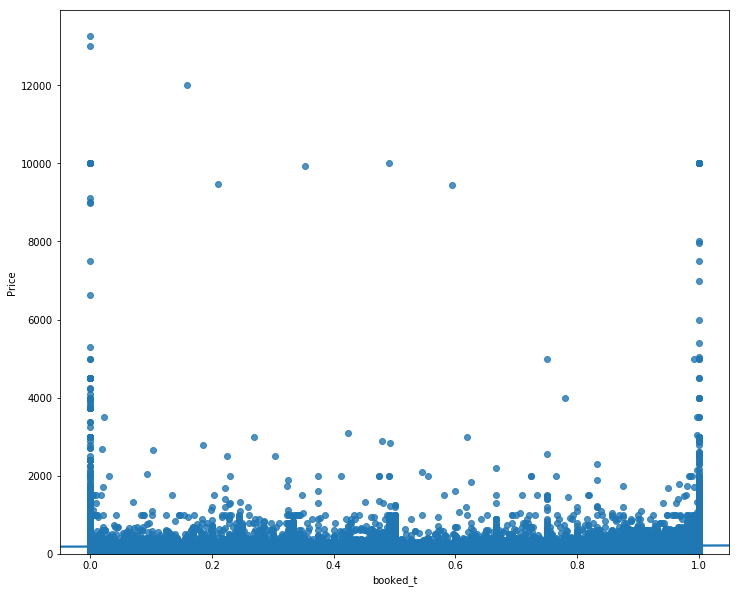

In [68]:
#use dataframe above to plot regression line and scatter plot 
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="booked_t", y="Price", data=price_table)
plt.ylim(0,)

From the plot above we can see that the relationship between price and booking is not a linear one. There is an even distribution between these values. We can confirm this further by calculating the correlation between the two values.

In [70]:
price_table[['booked_t', 'Price']].corr() 

,booked_t,Price
booked_t,1.000000,0.052599
Price,0.052599,1.000000


We can see the correlation between the 2 values is 0.052599 which is less than 0 thus confirming that there is no correlation between them

### Most booked time of year

For the final question,what time of the year gets booked the most in Toronto?, we will create a new table with all the necessary columns

In [74]:
Table_C = final_table.filter(['listing_id','date','booked_t'])
Table_C.head()

,listing_id,date,booked_t
0,291699,2019-12-08,1
1,291699,2019-12-09,1
2,291699,2019-12-10,0
3,291699,2019-12-11,0
4,291699,2019-12-12,0


In [75]:
#SPLIT THE DATE COLUMN FOR THE MONTH E.G. 12 
final_date = list()
for i in range(0,len(Table_C)):
    val =(Table_C['date'][i])
    x= val.split('-')
    final_date.append(x[1])
final_date

['12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',

In [76]:
#create a new data frame with the list
df = pd.DataFrame({'New_Date':final_date})
print (df.head(20))


   New_Date
0        12
1        12
2        12
3        12
4        12
5        12
6        12
7        12
8        12
9        12
10       12
11       12
12       12
13       12
14       12
15       12
16       12
17       12
18       12
19       12


In [103]:
#merge the new data frame with the existing data frame Table_C
Table_C['New_Date']=df
Table_C.head(10)

,listing_id,date,booked_t,New_Date
0,291699,2019-12-08,1,12
1,291699,2019-12-09,1,12
2,291699,2019-12-10,0,12
3,291699,2019-12-11,0,12
4,291699,2019-12-12,0,12
5,291699,2019-12-13,0,12
6,291699,2019-12-14,0,12
7,291699,2019-12-15,0,12
8,291699,2019-12-16,0,12
9,291699,2019-12-17,0,12


In [104]:
#drop the columns that we don't need
Table_C= Table_C.drop(columns=["date","listing_id"])
Table_C.head()

,booked_t,New_Date
0,1,12
1,1,12
2,0,12
3,0,12
4,0,12


In [105]:
#find the average booking for each month
months_booked= Table_C.groupby(['New_Date'],as_index=False).mean()
months_booked.head(20)

,New_Date,booked_t
0,01,0.509376
1,02,0.553080
2,03,0.438700
3,04,0.408817
4,05,0.411912
5,06,0.295049
6,07,0.276777
7,08,0.284047
8,09,0.261385
9,10,0.261142


We can observe from the table above that the time of year that gets booked the most is February which might be slightly surprising but I'll dive into more details on my blog post here:

Finally I just want to plot a bar graph to look at the average booking between the neighbourhoods in Toronto.

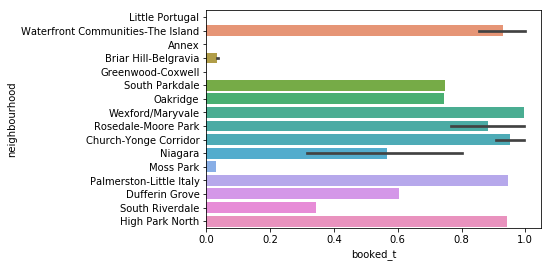

In [48]:
#we will be looking at the first 30 neighbourhoods in our data set
sns.barplot(x="booked_t", y="neighbourhood", data=most_booked.head(30));


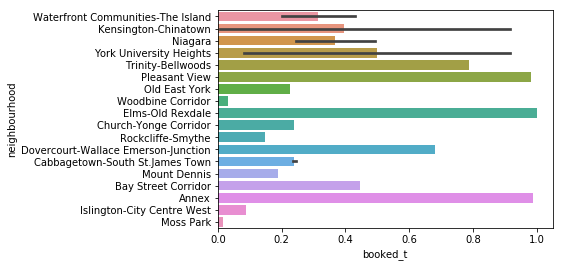

In [49]:
#Lets also look at the last 30 neighbourhoods in the data set
sns.barplot(x="booked_t", y="neighbourhood", data=most_booked.tail(30));